In [1]:
# loading the data 

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data =pd.read_csv('events_log.csv')
data.head()

,uuid,timestamp,session_id,group,action,checkin,page_id,n_results,result_position
0,00000736167c507e8ec225bd9e71f9e5,2.016030e+13,78245c2c3fba013a,b,searchResultPage,NaN,cbeb66d1bc1f1bc2,5.0,NaN
1,00000c69fe345268935463abbfa5d5b3,2.016031e+13,c559c3be98dca8a4,a,searchResultPage,NaN,eb658e8722aad674,10.0,NaN
2,00003bfdab715ee59077a3670331b787,2.016030e+13,760bf89817ce4b08,a,checkin,30.0,f99a9fc1f7fdd21e,NaN,NaN
3,0000465cd7c35ad2bdeafec953e08c1a,2.016030e+13,fb905603d31b2071,a,checkin,60.0,e5626962a6939a75,NaN,10.0
4,000050cbb4ef5b42b16c4d2cf69e6358,2.016030e+13,c2bf5e5172a892dc,a,checkin,30.0,787dd6a4c371cbf9,NaN,NaN


In [2]:
#Coverting the timestamp to panda datetime
data['timestamp'] = data['timestamp'].apply(lambda x: '{:.2f}'.format(x))
data.timestamp = pd.Series(data.timestamp).str.replace(r'\.00', '').str.strip()
data['timestamp']=pd.to_datetime(data['timestamp'])
data.timestamp[:4]

0   2016-03-01 10:38:42
1   2016-03-07 00:52:26
2   2016-03-02 14:53:05
3   2016-03-02 22:27:01
Name: timestamp, dtype: datetime64[ns]

In [3]:
# for labeling in plotting
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.02*height,
                '%d' % int(height),
                ha='center', va='bottom')

### Which results do people tend to try first

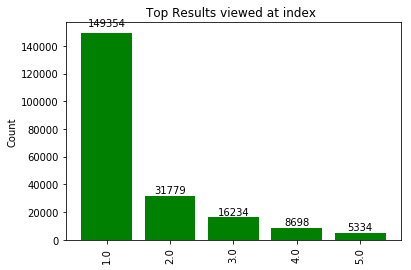

In [4]:
#getting most count result position plotting
import numpy as np
rp=data.result_position.value_counts()[:5]
labels=np.array(rp.keys())
values=np.array(rp)
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_ylabel("Count")
ax.set_title("Top Results viewed at index ")
autolabel(rects)
plt.show()

ffeae9d12ad83b25    24
5776ccc6144ff777    20
6151bd29e99dae15    19
6ea77e97a39691d2    19
c615cd435873eb74    17
Name: page_id, dtype: int64


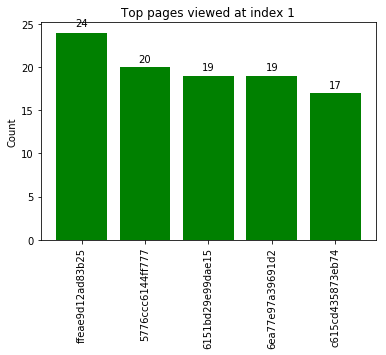

In [5]:
#top pages viewed at index 1
index1_pages=data.loc[data['result_position'] == 1]

tp=index1_pages.page_id.value_counts()[:5]
print(tp)
labels=np.array(tp.keys())
values=np.array(tp)
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticklabels(labels,rotation='vertical')
ax.set_xticks(ind)
ax.set_ylabel("Count")
ax.set_title("Top pages viewed at index 1")
autolabel(rects)
plt.show()

People tend to try first these pages 

### How does it change day-to-day

In [6]:
index1_pages.timestamp[:5]

8    2016-03-03 11:32:55
9    2016-03-03 22:33:53
11   2016-03-03 13:38:18
13   2016-03-08 17:26:37
14   2016-03-01 15:45:25
Name: timestamp, dtype: datetime64[ns]

In [7]:
days=index1_pages.timestamp.dt.day
days.unique()

array([3, 8, 1, 7, 5, 2, 6, 4], dtype=int64)

So we can say from day 1 to day 8 ,people access the more pages which are at index 1 (result position 1 being top count)

[3, 8, 1, 7, 5, 2, 6, 4]
[20508, 18025, 18880, 21392, 14780, 19535, 17004, 19230]


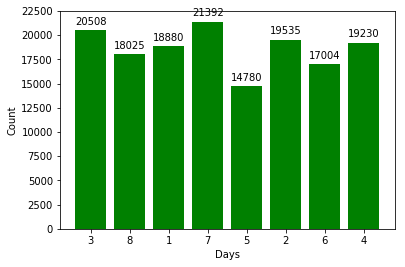

In [8]:
#plotting

days_array=[]
for day in days.unique():
    d=[day]
    days_hits=index1_pages.loc[index1_pages.timestamp.dt.day == day]
    d.append(days_hits.result_position.value_counts())
    days_array.append(d)
labels=[]
values=[]
for i in days_array:
    labels.append(i[0])
    values.append(i[1][1])
print(labels)
print(values)

labels=np.array(labels)
values=np.array(values)
ind=np.arange(len(labels))

fig,ax=plt.subplots()
rects=ax.bar(ind,values,color='g')
ax.set_xticklabels(labels)
ax.set_xticks(ind)
ax.set_ylabel("Count")
ax.set_xlabel("Days")
autolabel(rects)
plt.show()

So we can see here everyday how many people visit the pages at index 1 (result pages)
it goes high and low 

Applicable for 2016-03 

### What is their daily overall zero results rate? 